In [2]:
import os
from pathlib import Path

from es_sfgtools.processing.pipeline.data_handler import DataHandler
from es_sfgtools.utils.metadata.site import Site
from es_sfgtools.processing.operations.site_ops import (
    CTDfile_to_svp,

)
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = [32,18]
from es_sfgtools.utils.loggers import BaseLogger


In [3]:
main_dir = Path(f"{os.path.expanduser('~/data/sfg')}")
dh = DataHandler(main_dir)
OVERRIDE=True
RES_FILTER = 25
network = "cascadia-gorda"
station = "NCC1"
campaign = "2023_A_1063"
#campaign = "2024_A_1126"

dh.change_working_station(network=network, station=station, campaign=campaign)

Building directory structure for cascadia-gorda NCC1 2023_A_1063
No date range set for cascadia-gorda, NCC1, 2023_A_1063
Building TileDB arrays for NCC1
Changed working station to cascadia-gorda NCC1


In [4]:
#TODO: download metadata jsons and SS data from data.earthscope.org once its available, for now, load from local file
# ncc1_2024_config = dh.station_dir / "NCC1_2024_config.yaml"
svp_path = dh.station_dir / "NCC1_CTD_2021_fit"
svp_path_processed = dh.station_dir / "svp.csv"
if not svp_path_processed.exists():
    svp_df = CTDfile_to_svp(svp_path)
    svp_df.to_csv(svp_path_processed)

site_metadata_path = dh.station_dir / f"{station}.json"
vessel_metadata_path = dh.station_dir / f"1126.json"  #use the wrong one for now as thats all I have
gp_handler = dh.get_garpos_handler(site_config=site_metadata_path,
                      sound_speed_data=svp_path_processed,
                      vessel_data=vessel_metadata_path)
#site_metadata = Site.from_json(metadata_path)
#site_metadata.print_json()

In [5]:
gp_handler.set_campaign(campaign)

In [6]:
gp_handler.site.arrayCenter

ArrayCenter(latitude=41.6569428, longitude=-124.93031952, elevation=None)

In [7]:
update_dict = {"rejectcriteria": 2.5,"log_lambda":[0]}
gp_handler.set_inversion_params(update_dict)
for survey in list(gp_handler.current_campaign.surveys):
    print(survey)

id='2023_A_1063_1' type='' benchmarkIDs=['NCC1-1', 'NCC1-2', 'NCC1-3-2'] start=datetime.datetime(2023, 9, 8, 11, 40) end=datetime.datetime(2023, 9, 9, 2, 0) notes=None commands=None
id='2023_A_1063_2' type='' benchmarkIDs=['NCC1-1', 'NCC1-2', 'NCC1-3-2'] start=datetime.datetime(2023, 9, 9, 2, 0) end=datetime.datetime(2023, 9, 13, 19, 45) notes=None commands=None


In [8]:
gp_handler.prep_shotdata(overwrite=OVERRIDE)
update_dict = {"rejectcriteria": 2.5}
gp_handler.set_inversion_params(update_dict)

Preparing shot data
Shot data prepared and saved to /Users/gottlieb/data/sfg/cascadia-gorda/NCC1/GARPOS/2023_A_1063/2023_A_1063_1/2023_A_1063_1_.csv
Preparing shot data
Shot data prepared and saved to /Users/gottlieb/data/sfg/cascadia-gorda/NCC1/GARPOS/2023_A_1063/2023_A_1063_2/2023_A_1063_2_.csv


In [9]:
survey_id = f"{campaign}_1"
gp_handler.run_garpos(campaign_id=campaign, survey_id=survey_id,override=OVERRIDE)

Running GARPOS model for date(s) provided. Run ID: 0
Running GARPOS model for 2023_A_1063, . Run ID: 0


Running GARPOS for 2023_A_1063, 
           suffix  lamb0  lgrad  mu_t  mu_m
0  2023_A_1063__0    1.0    0.1   0.0   0.5
Inversion loop 001, RMS(TT) =  22.990960 ms, used_shot = 100.0%, reject =    0, Max(dX) =    10.0000, Hgt =   -982.719
Inversion loop 002, RMS(TT) =  22.272067 ms, used_shot = 100.0%, reject =    0, Max(dX) =    10.0000, Hgt =   -982.719
Inversion loop 003, RMS(TT) =  21.558098 ms, used_shot = 100.0%, reject =    0, Max(dX) =    10.0000, Hgt =   -982.719
Inversion loop 004, RMS(TT) =  20.849553 ms, used_shot = 100.0%, reject =    0, Max(dX) =    10.0000, Hgt =   -982.719
Inversion loop 005, RMS(TT) =  20.144863 ms, used_shot = 100.0%, reject =    1, Max(dX) =    10.0000, Hgt =   -982.719
Inversion loop 006, RMS(TT) =  19.436216 ms, used_shot =  99.9%, reject =    7, Max(dX) =    10.0000, Hgt =   -982.719
Inversion loop 007, RMS(TT) =  18.726843 ms, used_shot =  99.8%, reject =   17, Max(dX) =    10.0000, Hgt =   -982.719
Inversion loop 008, RMS(TT) =  18.018637 ms, u

Processing GARPOS results
GARPOS results processed, returning results tuple


Delta Center Position
Array :  East 5.755 m, North -2.139 m, Up 0.000 m 
TSP M5209 : East 0.070 m, North -0.270 m, Up -0.428 m 
TSP M5210 : East 0.043 m, North -0.219 m, Up -0.411 m 
TSP M5211 : East 0.092 m, North -0.293 m, Up -0.432 m 



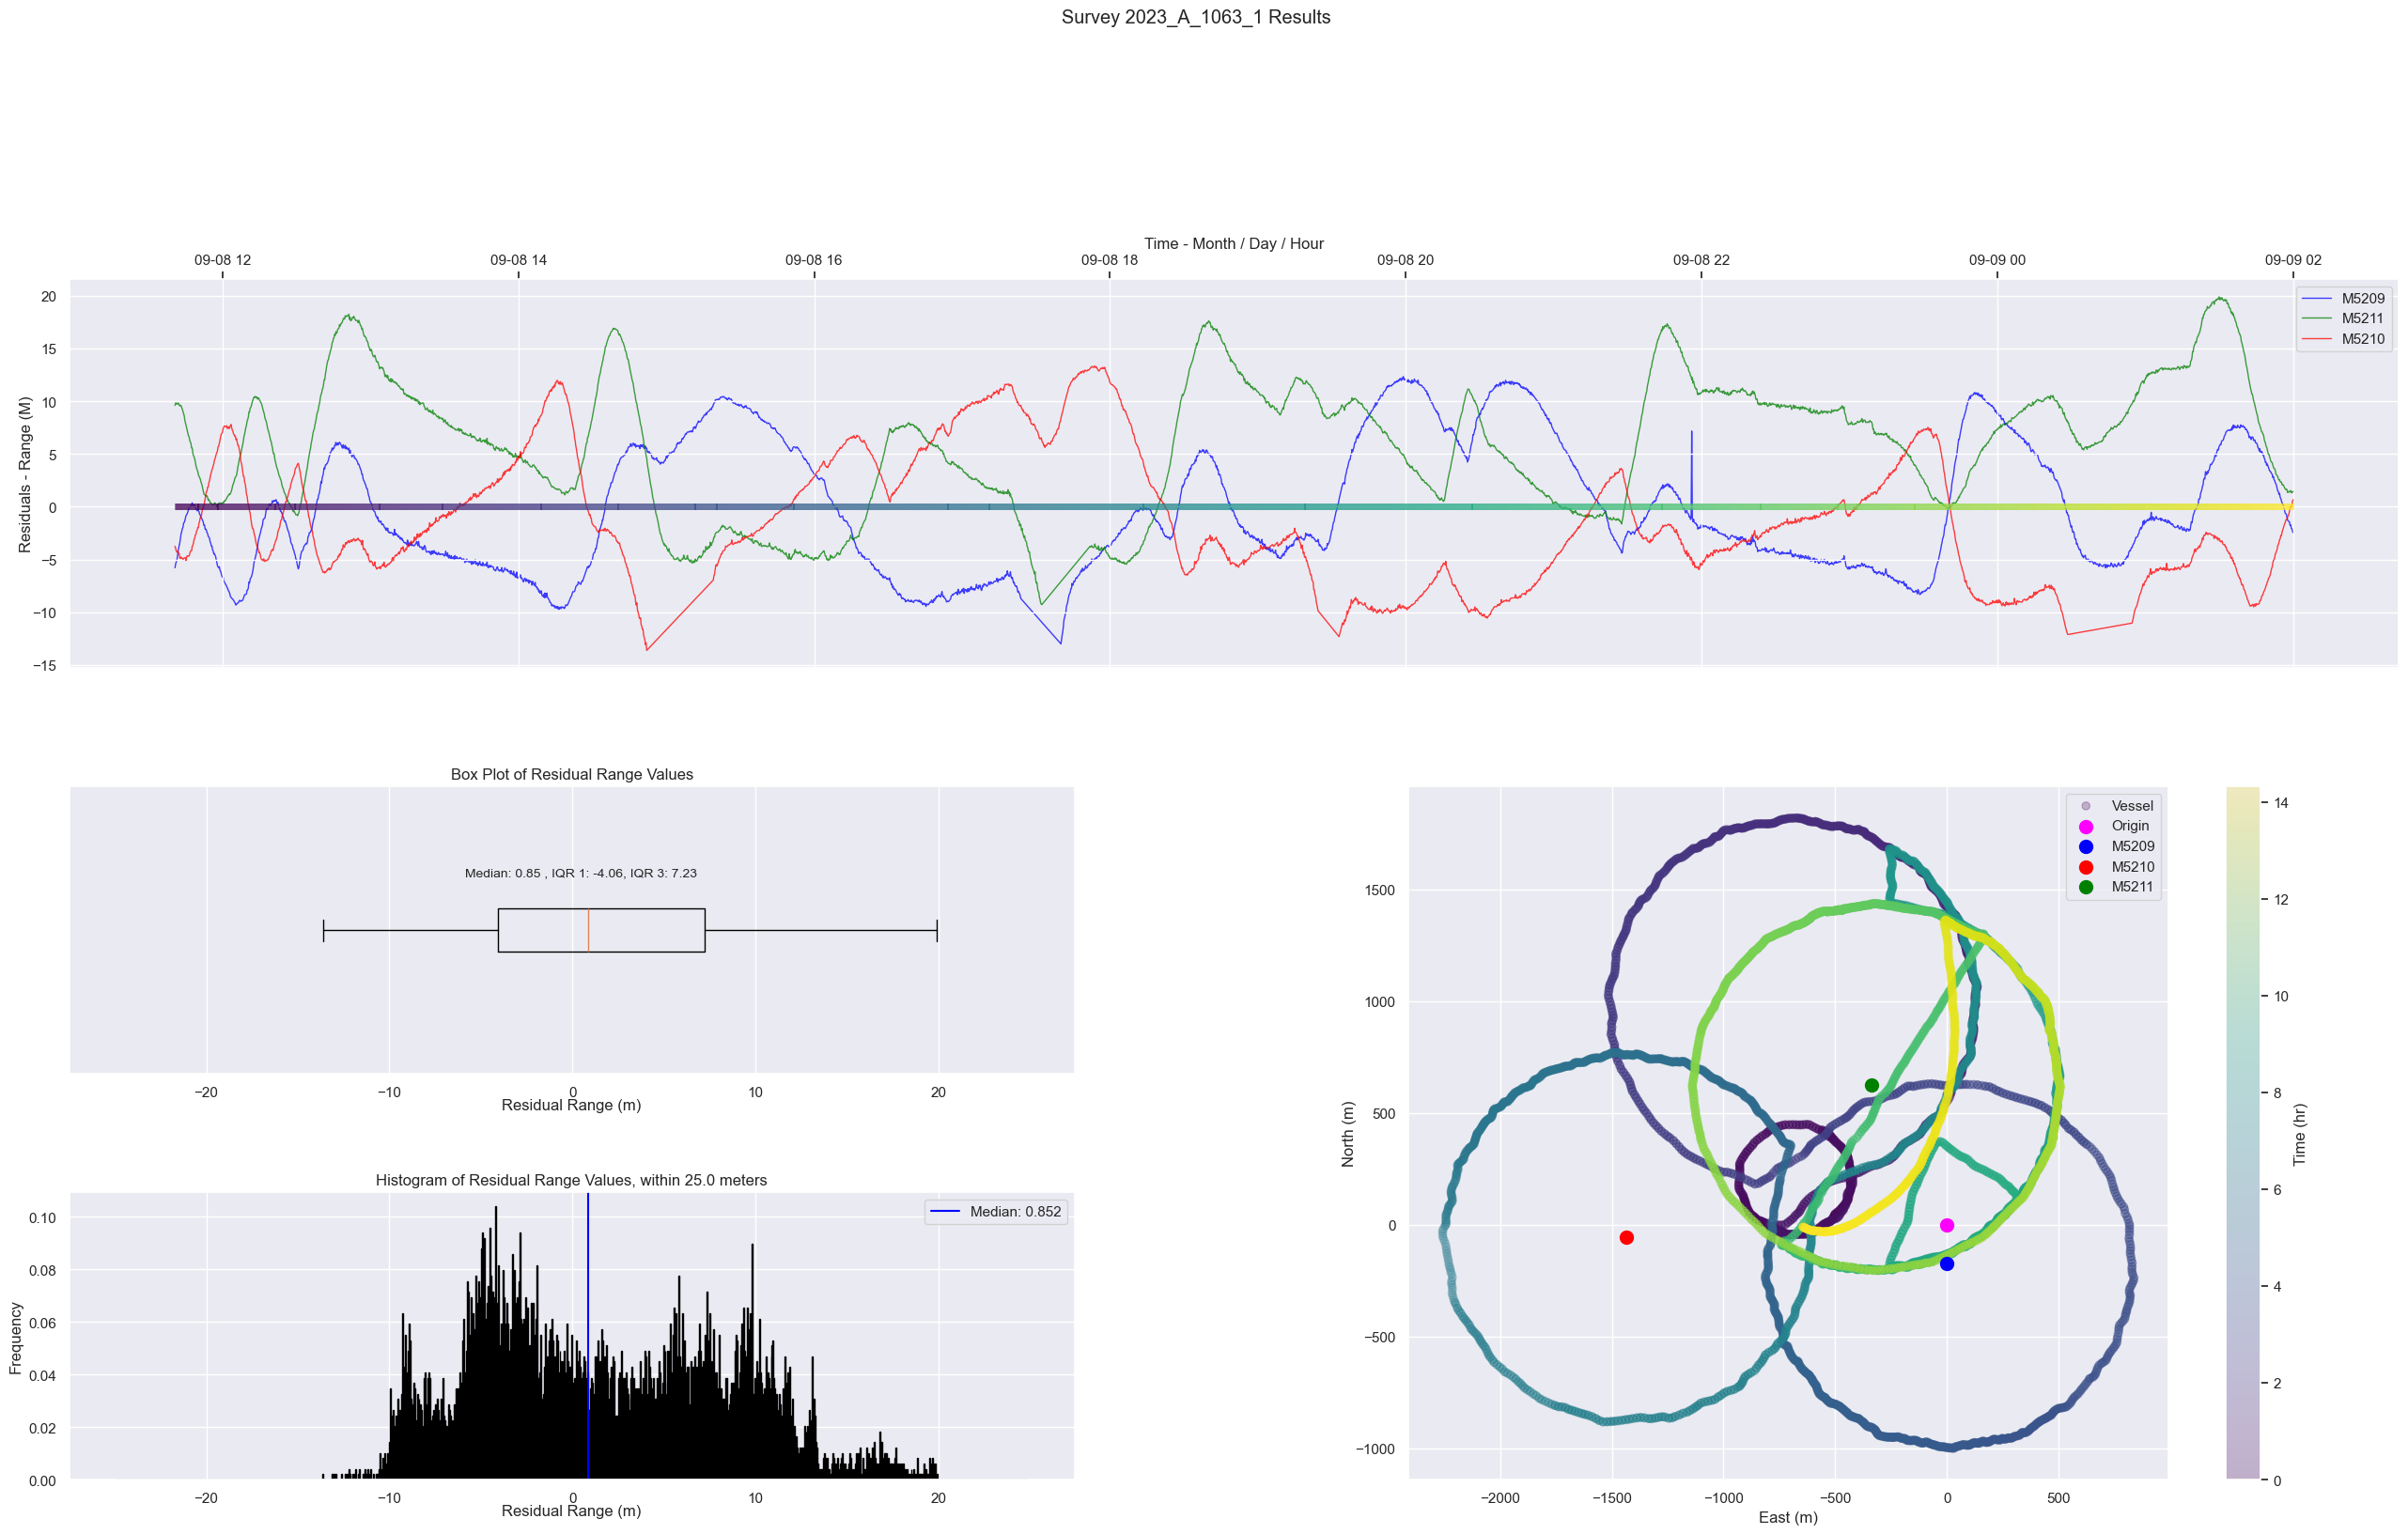

In [10]:
gp_handler.plot_ts_results(campaign, survey_id,res_filter=RES_FILTER)

In [21]:
survey_id = f"{campaign}_2"
gp_handler.run_garpos(campaign_id=campaign, survey_id=survey_id,override=OVERRIDE)

Running GARPOS model for date(s) provided. Run ID: 0
Running GARPOS model for 2023_A_1063, . Run ID: 0


Running GARPOS for 2023_A_1063, 
           suffix  lamb0  lgrad  mu_t  mu_m
0  2023_A_1063__0    1.0    0.1   0.0   0.5
Inversion loop 001, RMS(TT) =  27.301054 ms, used_shot =  96.1%, reject = 3202, Max(dX) =    10.0000, Hgt =   -982.719
Inversion loop 002, RMS(TT) =  26.255992 ms, used_shot =  94.5%, reject = 4453, Max(dX) =    10.0000, Hgt =   -982.719
Inversion loop 003, RMS(TT) =  25.289075 ms, used_shot =  93.8%, reject = 5045, Max(dX) =    10.0000, Hgt =   -982.719
Inversion loop 004, RMS(TT) =  24.302308 ms, used_shot =  93.5%, reject = 5323, Max(dX) =    10.0000, Hgt =   -982.719
Inversion loop 005, RMS(TT) =  23.331244 ms, used_shot =  93.2%, reject = 5494, Max(dX) =    10.0000, Hgt =   -982.719
Inversion loop 006, RMS(TT) =  22.373457 ms, used_shot =  93.1%, reject = 5632, Max(dX) =    10.0000, Hgt =   -982.719
Inversion loop 007, RMS(TT) =  21.430798 ms, used_shot =  92.9%, reject = 5734, Max(dX) =    10.0000, Hgt =   -982.719
Inversion loop 008, RMS(TT) =  20.497374 ms, u

Processing GARPOS results
GARPOS results processed, returning results tuple


Delta Center Position
Array :  East 1.011 m, North 2.452 m, Up 0.000 m 
TSP M5209 : East 0.007 m, North -0.285 m, Up -0.350 m 
TSP M5210 : East 0.003 m, North -0.265 m, Up -0.352 m 
TSP M5211 : East 0.002 m, North -0.277 m, Up -0.349 m 



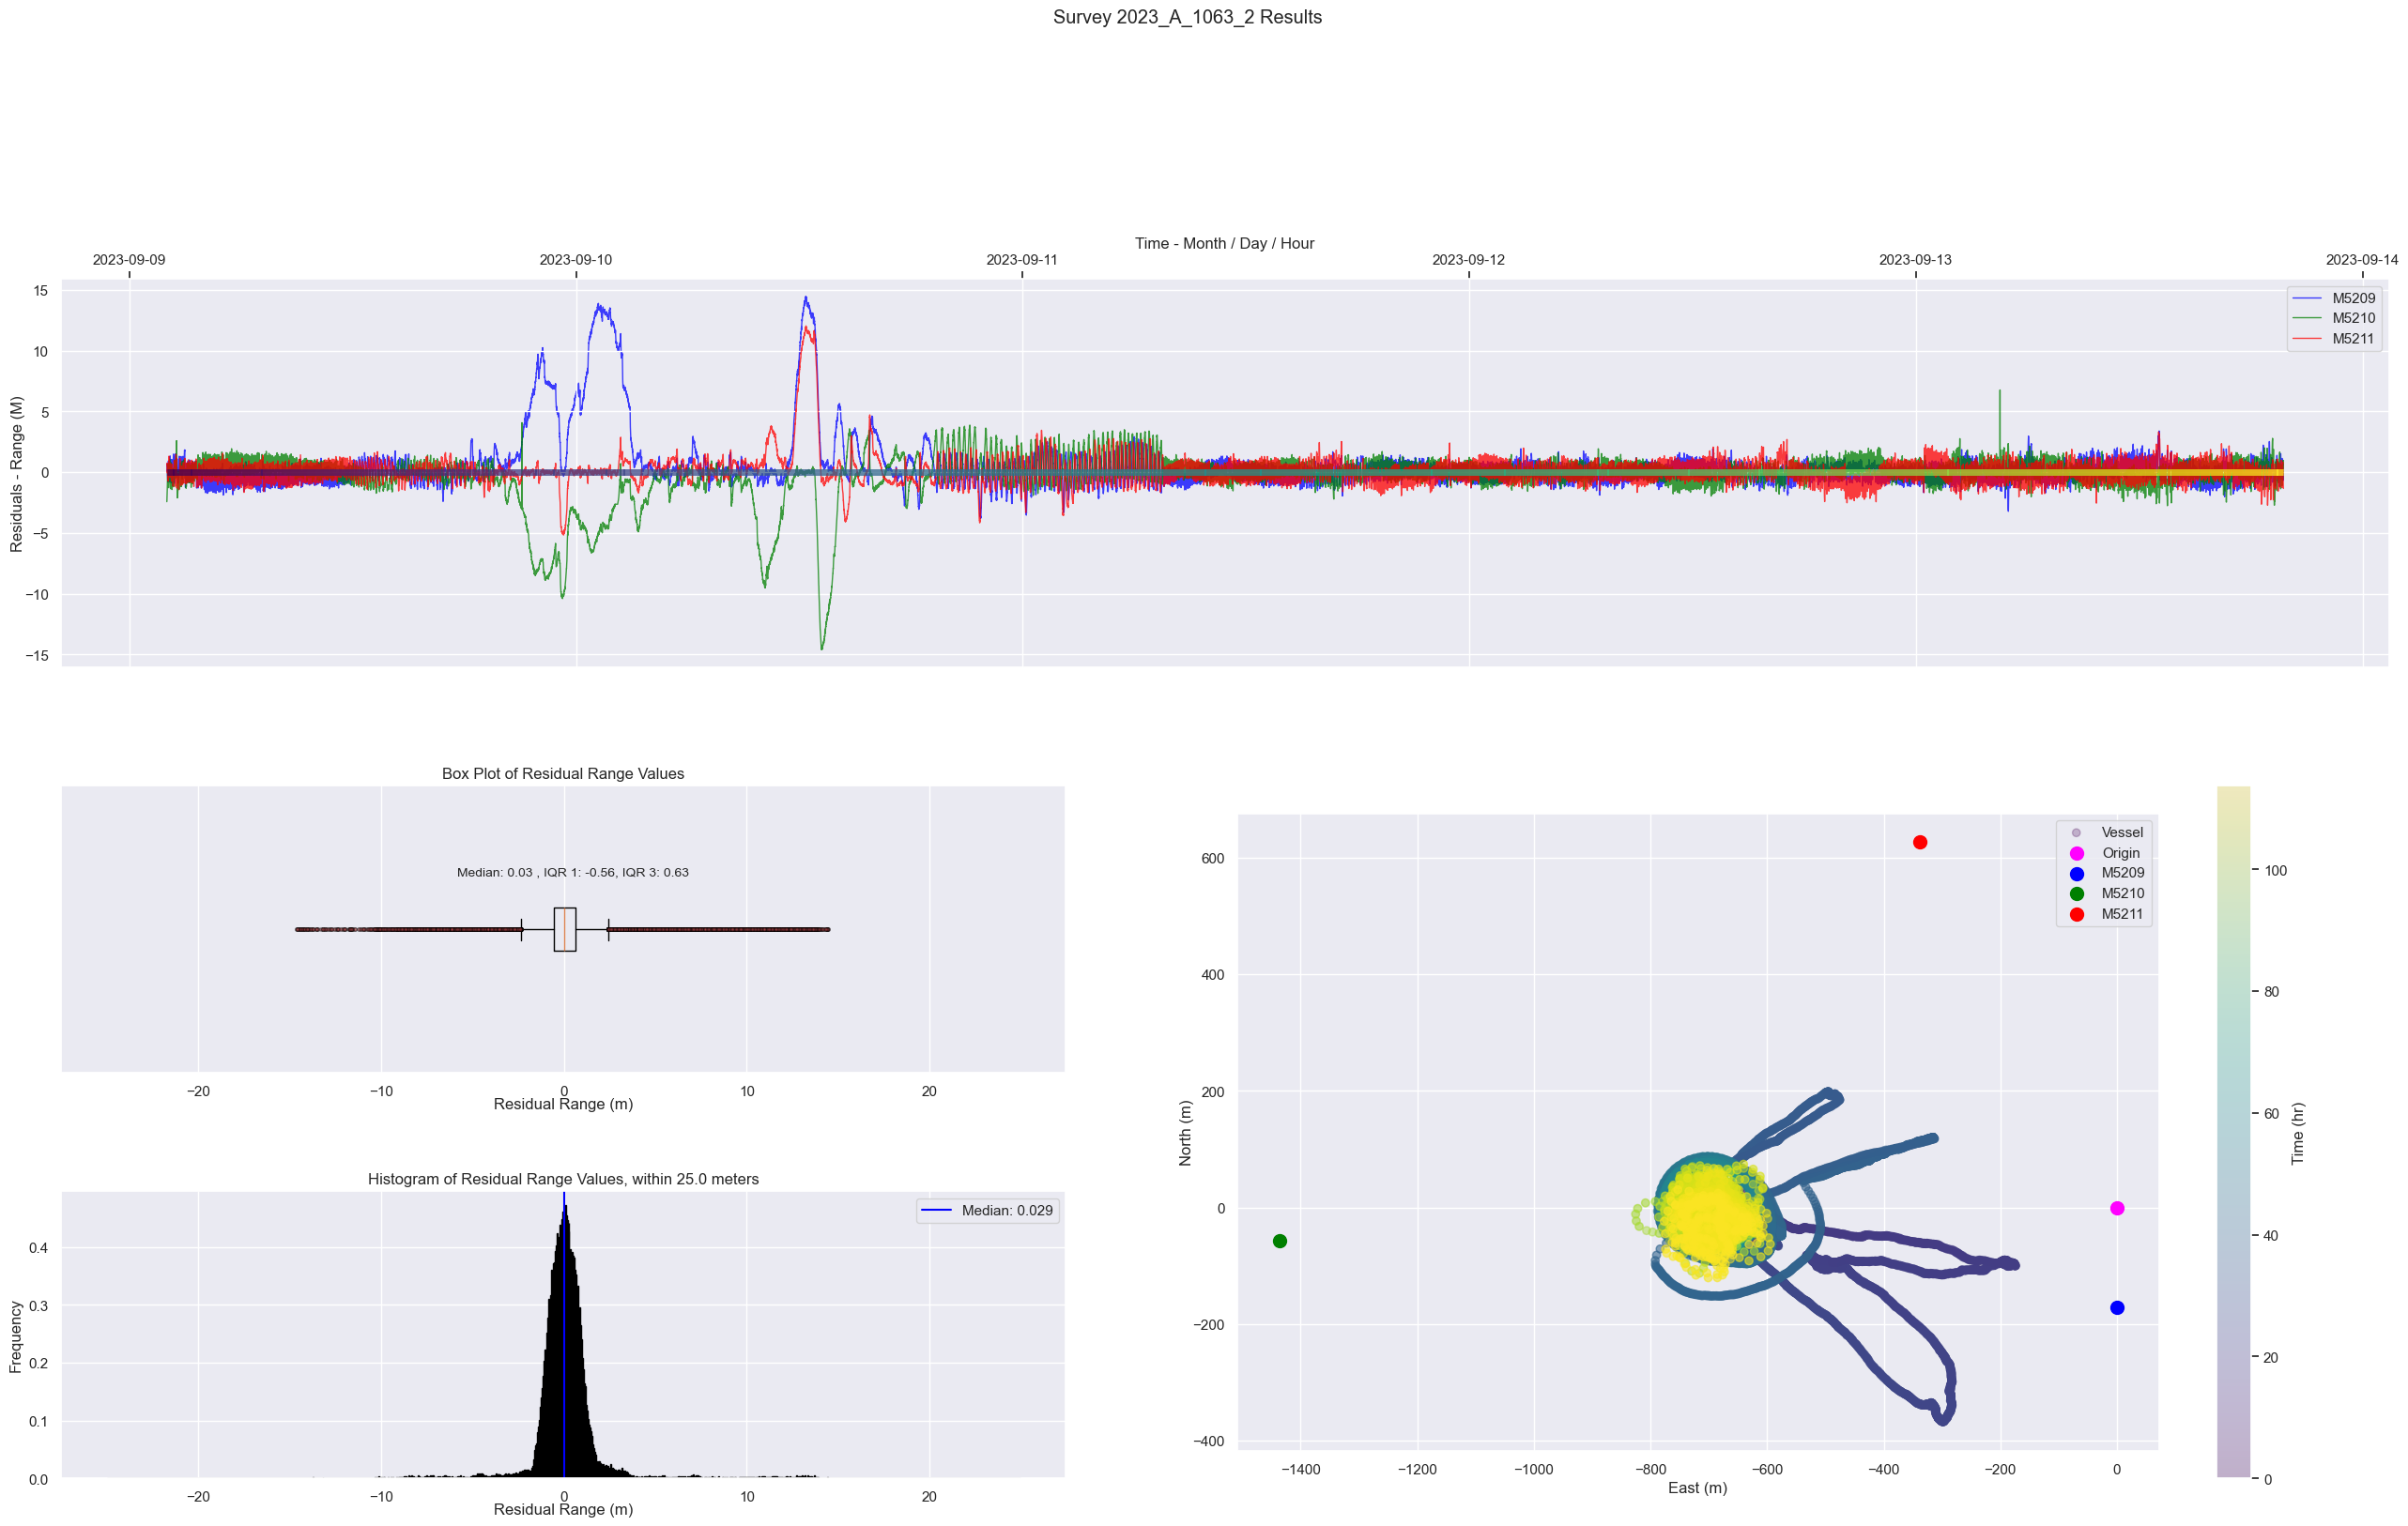

In [22]:
gp_handler.plot_ts_results(campaign, survey_id,res_filter=RES_FILTER)